## GSD Tokenomics
* 3% Backers / Partnership (1% Sys, 1% Lode, Jag (0.7% + 0.3%) 
* 7% Early Contributors ( 2%, 1% L, 1% K, 1% G, 0.8% Simon, 0.8% Augusto + 0.4% Big booba ) 
* 5% Foundation (Legal, operation, marketing, acquisition)  - No vesting
* 30% TGE, weekly release up to 3 years

#### Analysis contains the following:
* Pre-amble on Olympus tokenomics shortcomings
* Price control schedule proposal
* Supply and price projections

### Olympus Pre-amble

* On Aug 2021, Olympus proposed a reward rate framework guide policy decisions to align expectations for the community
* Can read proposal [here](https://forum.olympusdao.finance/d/77-oip-18-reward-rate-framework-and-reduction); according to the [FAQ](https://docs.olympusdao.finance/main/basics/basics), OIP-18 is currently in operation; here is a Q/A on Youtube discussing the details on OIP-18 and open discussion from Olympus team
* There are many benefits to using a proposal such as this: (a) consensus in the community; (b) bullish epoch events to introduce scarcity for hodling; and (c) can make point projection estimates to promote and project stability over time in the protocol to outside participants in the community
* GS DAO is exploring to innovate beyond this by incorporating a GSD price control policy in USD using arbitrage (see below for details)

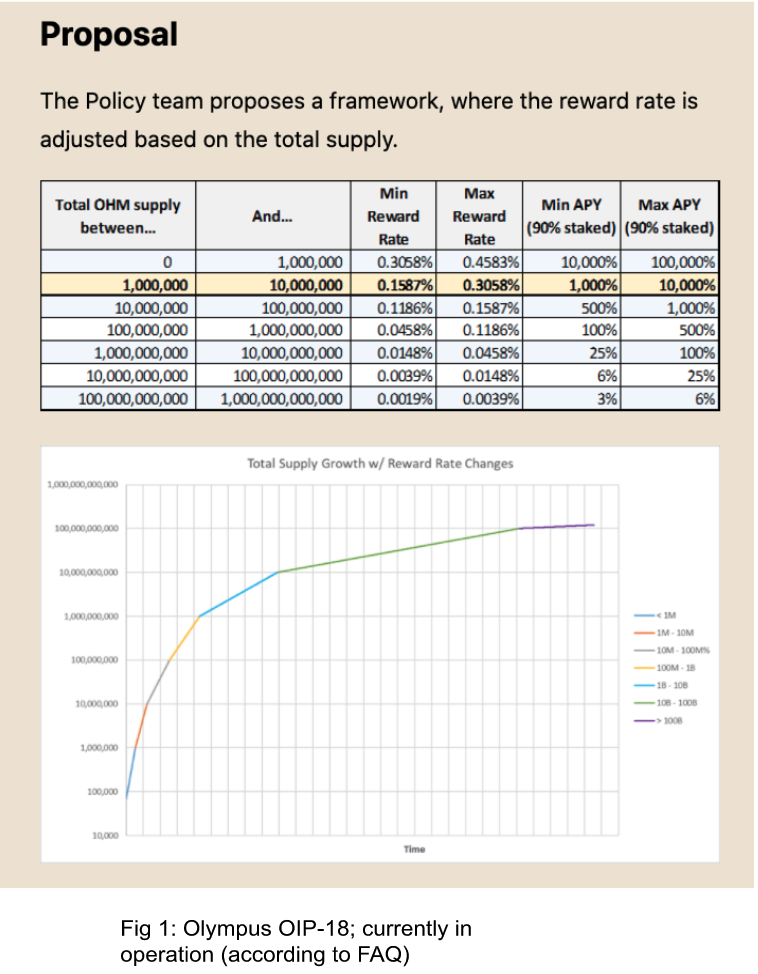

In [6]:
Image("img/proposal.png", width = 500, height = 500)

### Introduction of GSD Price Control: Motivation

* During Aug 2021 open discussion of OIP-18 with Olympus Team, it was mentioned that they intuitively felt the price of OHM should drop over time
* We proposed to extend this intuition further with the introduction of a price control policy structure into GSD in accordance to each epoch
* The protocol price will be allowed to free float within a range about a target price
* We are proposing the target price Pk at each epoch point to be:
> $P_{k}$ = $P_{k-1}$ / 1.618, where k {1,2,3, ...} is epoch number
* The denominator in the above eq. is the ‘golden’ ratio (ie,  = 1.618), and was selected due to its presence in many naturally occurring phenomena (ie, stock market, ocean waves, weather patterns, snail shells, whirlpools, etc …), also for marketing 
* Hence, if the starting price is 150 USD, then the ‘target’ epoch prices would be 92, 57, 35, … USD respectively at each epoch point where gold backing will get successively stronger over time 
* The target price within each epoch would drop logarithmically between epochs (see Fig 1D) 
* Structured dropping of ‘target’ price has several key benefits:
    * Promotes and projects stability over time in the protocol to participants in the GS DAO community
    * Keeping the gold backing at a constant 1/1000 oz per GSD strengthens the protocol over time (somewhat akin to BTC’s increase in hash rate over time)
    * Stronger gold backing over time will entice bigger, less risk averse players into the protocol as supply grows
    * Creates bullish events at end of each epoch, enticing more players to jump in before price and APY drop (akin to the halvening events in BTC)
* Along with the price drop we propose a price operating range that will get smaller over time as a function of APY; so the smaller the APY, the smaller the allocated operating price range
* A structured dropping of price action range also has several key benefits:
    * Exceptionally large APY (~7K%) with current OHM price swings (currently 200 to 1300 USD) justifies participants to hold token; however without price swing control policies in place, participants may be enticed to sell off tokens if volatility stays the same as APY drops and with no governance around price swings, hence creating belief that OHM may be a ponzi scheme leading to destabilizing events
    * Participants can participate with a predetermined level of risk appetite according to price swing policy (ie, high APY -> high risk, low APY -> low risk)
    * For example, at beginning of first epoch (k=1), price is allowed to swing (23 to 971 USD) with APY of 12000%, whereas in sixth epoch (k=6), price is allowed to swing (7.4 to 9.4 USD) with APY of 6% 
    * If price goes outside the range, arbitrage sets in to bring price back within control range using the free floating capital in the treasury
* Policy rules presented here are initial suggestions and open for debate and collaboration

In [4]:
import os
import datetime
import pandas as pd
import numpy as np
import matplotlib
import statsmodels.api as sm
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.interpolate import interp1d
from IPython.display import Image
cwd =  os.getcwd().replace("notebooks","")
os.chdir(cwd)

In [3]:
def formatDates(arr,date_format="%Y-%m-%d %H:%M"):
    return [datetime.datetime.strptime(d, date_format) for d in arr]

def stripCharacter(arr,c,r=''):
    return [e.replace(c, r) for e in arr]

def str2Float(arr):   
    res = np.zeros(len(arr))
    for k in range(len(arr)):  
        try: 
            res[k] = float(arr[k]) 
        except: 
            res[k] = np.nan   
    return res

def getDate(t, strt_date):
    return datetime.datetime.strptime(strt_date, "%Y-%m-%d") + datetime.timedelta(days=t) 

def imputeArr(arr):
    arr = pd.Series(list(arr)).interpolate(method='linear')
    return np.array(arr)

def convertDateArr(arr):
    return [convertDate(d) for d in arr]

def convertDate(val):
    d = val.split(' ')
    d = [d[2],month_map[d[0]],d[1]]    
    return '-'.join(d)


In [4]:
btc_historical = pd.read_csv('../resources/btc_historical.csv')
eth_historical = pd.read_csv('../resources/eth_historical.csv')

#### Generate random sequence

In [4]:
def func_log(x, a, b, c):
    """Return values from a general log function."""
    return a * np.log(b * x) + c

def generate_data(func, *args, jitter=0, xs):
    """Return a tuple of arrays with random data along a general function."""
    ys = func(xs, *args)
    noise = jitter * np.random.normal(size=len(xs)) + jitter
    xs = xs.reshape(-1, 1)                                  # xs[:, np.newaxis]
    ys = (ys + noise).reshape(-1, 1)
    return xs, ys

def gen_random_capital(N):
    
    empty_dataset = np.zeros(N)
    mod = sm.tsa.SARIMAX(empty_dataset, order=(0, 1, 1), initialization='diffuse')
    simulations = mod.simulate([-5/3, 5/6, 4**2], N)
    t = np.array(range(1,N+1))

    shape, scale = 100, 3  
    s = np.random.gamma(shape, scale, N)

    x_samp, y_samp = generate_data(func_log, 1, 1.2, 2, xs=t)

    sim = (s + np.abs(simulations))*np.exp(y_samp.flatten())
    sim_block_occupancy = np.abs(simulations)/max(np.abs(simulations))
    
    return sim_block_occupancy


#### Formatting functions

In [5]:
def getDate(t, strt_date):
    return datetime.datetime.strptime(strt_date, "%Y-%m-%d") + datetime.timedelta(days=t) 

def func(x, p1, p2):
    return p1*np.log(x) + p2

def x2Percent(x):
    return 100*(x - 1)

def percent2X(percent):
    return 1 + percent/100

def apy2Rebase(apy,f):
    x = percent2X(apy)
    return 100*(x**(1/f) - 1)

def unit_return(token, apy, t, freq = 12):
    multiplier = 1 + apy/100
    return token*(multiplier)**(t/freq)

def compound_return(rebase, freq=12, deposit=1):
    return deposit*(1+rebase/100)**(freq)

def apy_return(rebase,freq):
    annualX = compound_return(rebase,freq)
    return x2Percent(annualX)

def time_units_between(a0,a1,rebase):
    return np.log(a1/a0)/np.log(1+rebase/100)


In [6]:
STRT_DATE_BTC = btc_historical['Date'].values[0]
N_BTC = len(btc_historical)

Np = 365*10
ydata = np.log(btc_historical['Price'].values)
xdata = [x+1 for x in range(len(btc_historical))] #just use numbers for dates
popt, pcov = curve_fit(func, xdata, ydata, p0=(3.0, -10))
price_pred = func(np.array([x+1 for x in range(N_BTC+Np)]), popt[0], popt[1])#pass values to function
dates_pred = np.array([getDate(t, STRT_DATE_BTC) for t in range(N_BTC+Np)])


#### BTC Logarithmic projections

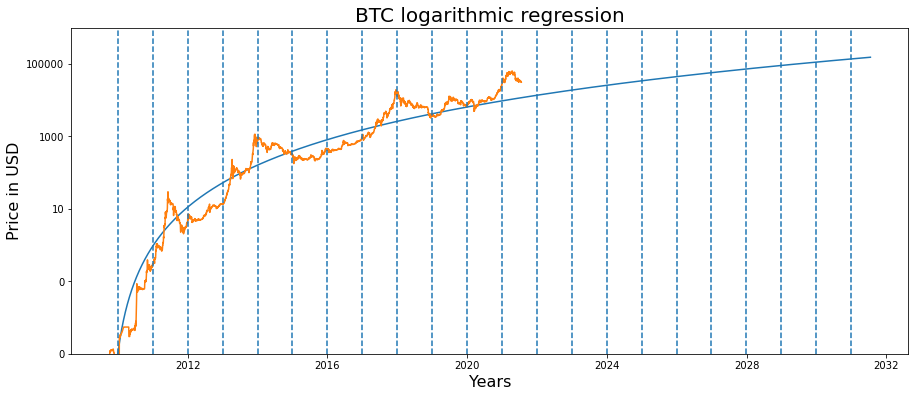

In [7]:
fig, ax = plt.subplots(figsize=(15, 6))
plt.yscale('log', subs=[1])
ax.yaxis.set_major_formatter(matplotlib.ticker.ScalarFormatter())
ax.yaxis.set_minor_formatter(matplotlib.ticker.ScalarFormatter())
plt.plot(dates_pred, np.exp(price_pred)) #exponentiate the data
plt.plot(dates_pred[:N_BTC], btc_historical['Price'].values) #exponentiate the data
plt.title("BTC logarithmic regression", fontsize=20)
plt.ylabel("Price in USD", fontsize=16)
plt.xlabel('Years', fontsize=16)
plt.ylim(bottom=0.001)
for k in range(88,N_BTC+Np,365):
    plt.axvline(x=dates_pred[k],linestyle='--')
plt.show()
fig.savefig('../img/btc_log_model.png')


In [8]:
yoy = []
for k in range(1,N_BTC+Np,365):
    yoy.append(np.exp(price_pred[k]))
yoy = np.array(yoy) 

apy_btc = 100*(yoy[1:]-yoy[:len(yoy)-1])/yoy[:len(yoy)-1]
btc_yrs = np.linspace(1, len(apy_btc), num=len(apy_btc))

In [9]:
STRT_DATE_ETH = eth_historical['time'].values[0]
N_ETH = len(eth_historical)

Np = 365*10
ydata = np.log(eth_historical['close'].values)
xdata = [x+1 for x in range(len(eth_historical))] #just use numbers for dates
popt, pcov = curve_fit(func, xdata, ydata, p0=(3.0, -10))
price_pred = func(np.array([x+1 for x in range(N_ETH+Np)]), popt[0], popt[1])#pass values to function
dates_pred = np.array([getDate(t, STRT_DATE_ETH) for t in range(N_ETH+Np)])


#### ETH Logarithmic projections

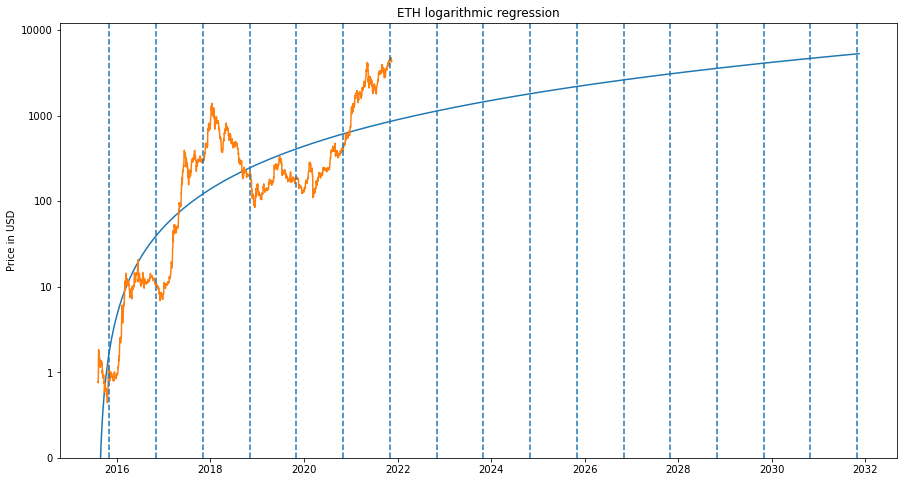

In [27]:
fig, ax = plt.subplots(figsize=(15, 8))
plt.yscale('log', subs=[1])
ax.yaxis.set_major_formatter(matplotlib.ticker.ScalarFormatter())
ax.yaxis.set_minor_formatter(matplotlib.ticker.ScalarFormatter())
plt.plot(dates_pred, np.exp(price_pred)) #exponentiate the data
plt.plot(dates_pred[:N_ETH], eth_historical['close'].values) #exponentiate the data
plt.title("ETH logarithmic regression")
plt.ylabel("Price in USD")
plt.ylim(bottom=0.1)
for k in range(88,N_ETH+Np,365):
    plt.axvline(x=dates_pred[k],linestyle='--')
plt.show()


In [11]:
yoy = []
for k in range(1,N_ETH+Np,365):
    yoy.append(np.exp(price_pred[k]))
yoy = np.array(yoy) 

apy_eth = 100*(yoy[1:]-yoy[:len(yoy)-1])/yoy[:len(yoy)-1]
eth_yrs = np.linspace(1, len(apy_eth), num=len(apy_eth))

#### Proposed price control schedule

Given supply level of $1 \times 10^{6+k}$, we propose a price control of

$P_{k} = \frac{P_{0}}{\phi^{k}}$, where
* $P_{0}$ is the initial price
* $P_{k}$ is the price at the supply changeover to next order of magnitude
* $\phi$ is the golden ratio

In [12]:
PHI = 1.6180339887
# supply = np.array([1e5,1e6,1e7,1e8,1e9,1e10,1e11,1e12]) # Olympus
# supply = np.array([250000,1e7,1e8,1e9,1e10,1e11,1e12]) # GSD 1
# supply = np.array([250000,1e7,1e8,1e9,1e10,1e11,1e12]) # GSD 2
supply = np.array([200000,1e7,1e8,1e9,1e10,1e11,1e12]) # GSD 3
p_control_schedule = np.array([1/(PHI**k) for k in range(len(supply))])

In [13]:
# apy_schedule = np.array([1e4,1e3,500,100,25,6,3]) # Olympus
apy_schedule = np.array([5000,1500,500,100,25,6]) # GSD 1
# apy_schedule = np.array([12000,2000,500,100,25,6]) # GSD 2
# apy_schedule = np.array([30000,3000,500,100,25,6]) # GSD 3
rebase = apy2Rebase(apy_schedule,365*3)
yrs_between = np.array([0])

for k in range(1,len(supply)):
    time_btwn = time_units_between(supply[k-1],supply[k],rebase[k-1])/(3*365)
    yrs_between = np.append(yrs_between,time_btwn)

yrs_apy_schedule = np.cumsum(yrs_between)  

In [14]:
fibs = np.array([0,1,2,3,5,8,13,21,34,55])
fibyrs = np.array([0,1,2,3,5,8,13,21])
yrs = np.cumsum(fibyrs)/2
yrs = yrs_apy_schedule

#### GSD Policy: Supply vs APY 

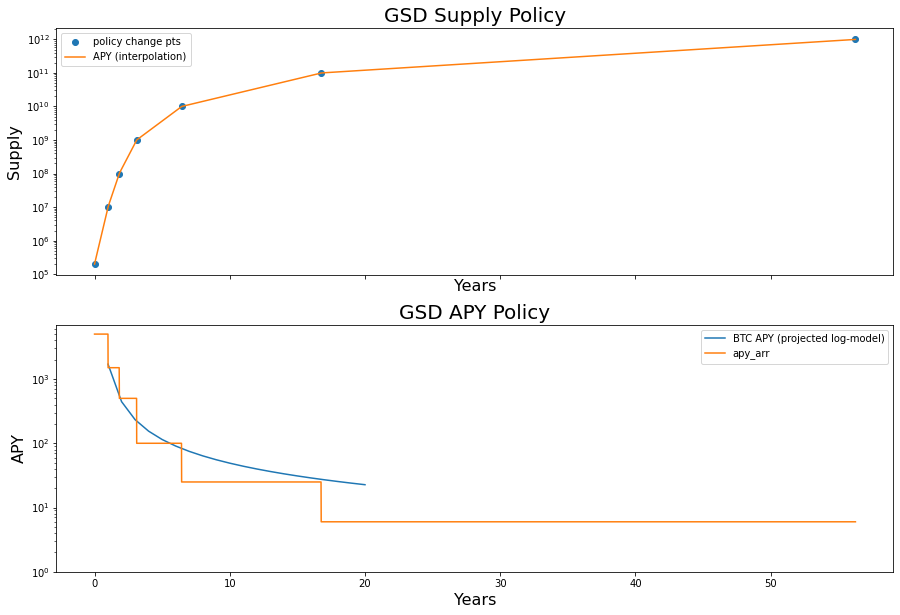

In [15]:
yrs_interp = np.arange(0,yrs[-1],1/(365*3))
supply_interp = np.exp(np.interp(yrs_interp, yrs, np.log(supply)))

rebase_arr = 100*(supply_interp[1:]/supply_interp[:-1] - 1)
rebase_arr = np.append(rebase_arr,rebase_arr[-1])
apy_arr = apy_return(rebase_arr,365*3)

fig, (supply_ax, apy_ax) = plt.subplots(nrows=2, sharex=True, sharey=False, figsize=(15, 10))

supply_ax.set_yscale('log')
supply_ax.plot(yrs, supply, 'o', label='policy change pts')
supply_ax.plot(yrs_interp, supply_interp, '-', markersize=3, label='APY (interpolation)')

supply_ax.set_ylabel('Supply', fontsize=16)
supply_ax.set_xlabel('Years', fontsize=16)
supply_ax.set_title("GSD Supply Policy", fontsize=20)
supply_ax.legend()

apy_ax.set_yscale('log')
apy_ax.plot(btc_yrs[:-1], apy_btc[1:], label='BTC APY (projected log-model)')
apy_ax.plot(yrs_interp, apy_arr, label='apy_arr')
apy_ax.set_ylabel('APY', fontsize=16)
apy_ax.set_xlabel('Years', fontsize=16)
apy_ax.set_title("GSD APY Policy", fontsize=20)
apy_ax.set_ylim(bottom=1)
apy_ax.legend()
fig.savefig('../img/gsd_apy.png')


#### Required Gold backing when supply hits 1 Trillion GSD

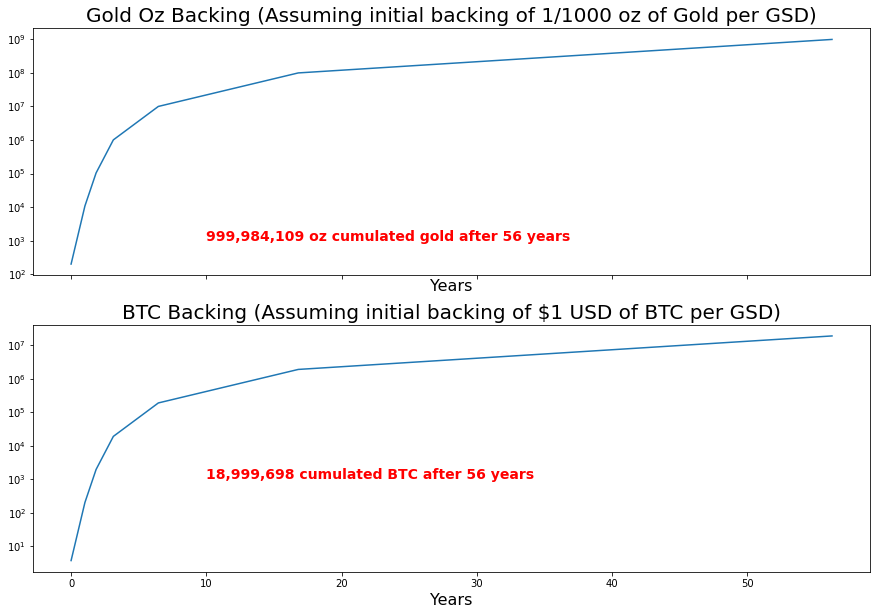

In [16]:
# gold_oz_per_gsi = 1/1782.60
gold_oz_per_gsi = 1/1000
btc_per_gsi = 0.000019
eth_per_gsi = 0.00024

btc_cummulation = btc_per_gsi*supply_interp
gold_oz_cummulation = gold_oz_per_gsi*supply_interp

gold_25_yrs = str(format(int(gold_oz_cummulation[-1]), ',d'))
btc_25_yrs = str(format(int(btc_cummulation[-1]), ',d'))

fig, (gold_ax, btc_ax) = plt.subplots(nrows=2, sharex=True, sharey=False, figsize=(15, 10))
gold_ax.set_yscale('log', subs=[1])
gold_ax.plot(yrs_interp, gold_oz_cummulation, label='GSD Price Expectation')
gold_ax.set_title("Gold Oz Backing (Assuming initial backing of 1/1000 oz of Gold per GSD)", fontsize=20)
gold_ax.text(10,1e3,'{} oz cumulated gold after {} years'.format(gold_25_yrs, round(yrs[-1])),
            weight="bold", color = 'red', fontsize=14)
gold_ax.set_xlabel('Years', fontsize=16)

btc_ax.set_yscale('log', subs=[1])
btc_ax.plot(yrs_interp, btc_cummulation, label='GSD Price Expectation')
btc_ax.set_title("BTC Backing (Assuming initial backing of $1 USD of BTC per GSD)", fontsize=20)
btc_ax.text(10,1e3,'{} cumulated BTC after {} years'.format(btc_25_yrs, round(yrs[-1])),
            weight="bold", color = 'red', fontsize=14)
btc_ax.set_xlabel('Years', fontsize=16)
fig.savefig('../img/backing.png')


#### Proposed price swing control policy
* USD Price of GSD should be alowed to float within an allocated range that goes in accordance to its corresponding APY and price control scedule
* For instance at the project onset where APY 9900\%, price is allowed to swing between \\$33 and \\$1194
* However when APY is much smaller at year 25 where APY is 25\%, price swings to excessive highs and lows do not provide enough incentive for participants to hold the asset, hence price is allowed to swing between \\$5.64 and \\$8.79 

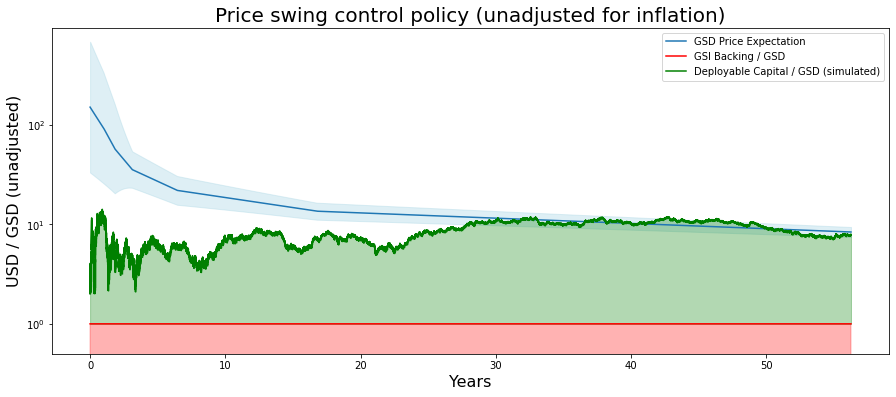

In [17]:
P0 = 150
a = apy_arr
p_control = np.exp(np.interp(yrs_interp, yrs, np.log(P0*p_control_schedule)))

apy_arr_schedule = apy_arr[(yrs*365*3).astype(int)]
apy_arr_swing = np.exp(np.interp(yrs_interp, yrs, np.log(apy_arr_schedule)))

p_swing = percent2X(5*np.sqrt(apy_arr_swing))
p_control_upr = p_control*p_swing
p_control_lwr = p_control/p_swing


deployable_capital = 2+p_control*gen_random_capital(len(yrs_interp)) 
backing = np.ones(len(yrs_interp))
bot = np.zeros(len(yrs_interp))

fig, ax = plt.subplots(figsize=(15, 6))
plt.yscale('log', subs=[1])
plt.plot(yrs_interp, p_control, label='GSD Price Expectation')
plt.plot(yrs_interp, backing,  color='red', label='GSI Backing / GSD')
plt.plot(yrs_interp, deployable_capital,  color='green', label='Deployable Capital / GSD (simulated)')
plt.fill_between(yrs_interp, p_control_lwr, p_control_upr, alpha=0.4, color='lightblue')

plt.fill_between(yrs_interp, bot, backing, alpha=0.3, color='red')
plt.fill_between(yrs_interp, backing, deployable_capital, alpha=0.3, color='green')
plt.title("Price swing control policy (unadjusted for inflation)", fontsize=20)
plt.ylabel("USD / GSD (unadjusted)", fontsize=16)
plt.xlabel("Years", fontsize=16)
plt.ylim(bottom=0.5)
plt.legend()
fig.savefig('../img/price_control.png')


#### Plot projections from initial investment of 1 GSD

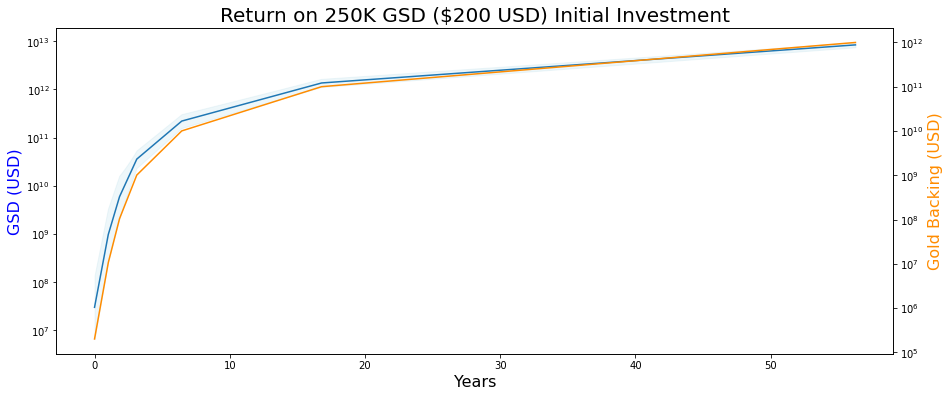

In [26]:
rebase = apy2Rebase(apy_arr,365*3)
rates = percent2X(rebase)

invest_gsd = np.array([200000])

for k in range(1,len(apy_arr)):
    invest_gsd = np.append(invest_gsd,invest_gsd[k-1]*rates[k-1])
    
invest_usd =  p_control*invest_gsd   
invest_usd_upr =  p_control_upr*invest_gsd 
invest_usd_lwr =  p_control_lwr*invest_gsd  
    
fig, gsd_ax = plt.subplots(figsize=(15, 6))
gold_ax = gsd_ax.twinx()
gsd_ax.set_yscale('log', subs=[1])
gold_ax.set_yscale('log', subs=[1])
gsd_ax.plot(yrs_interp, invest_usd, label='USD (unadjusted)')
gsd_ax.fill_between(yrs_interp, invest_usd_lwr, invest_usd_upr, alpha=0.2, color='lightblue')
gold_ax.plot(yrs_interp, invest_gsd, label='Gold Backing (units)',color='darkorange')
gsd_ax.set_title("Return on 250K GSD ($200 USD) Initial Investment", fontsize=20)
gsd_ax.set_ylabel("GSD (USD)", fontsize=16,color='blue')
gsd_ax.set_xlabel("Years", fontsize=16)
#gsd_ax.set_ylim(bottom=0.1,top=1.2e8)
#gold_ax.set_ylim(bottom=0.1,top=1.2e8)
gold_ax.set_ylabel("Gold Backing (USD)", fontsize=16,color='darkorange')
fig.savefig('../img/gsd_vs_gold_backing.png')


#### Tabulate projections from initial investment of 1 GSD

In [19]:
res = pd.DataFrame()

year_arr = np.array([0])
yoy_usd_arr = np.array([0])
yoy_gsd_arr = np.array([0])
year = -1

interval = int(365*3/12) 
interval = int(365*3/12) 

for k in range(len(invest_usd)):
    reset_year = k % interval == 0
    year = year + 1 if reset_year else year  
    if (reset_year):
        
        if(year > 0):
            year_arr = np.append(year_arr,year)
            yoy_usd = 100*(invest_usd[k] - invest_usd[k-interval])/invest_usd[k-interval]
            yoy_usd_arr = np.append(yoy_usd_arr,yoy_usd)
            yoy_gsd = 100*(invest_gsd[k] - invest_gsd[k-interval])/invest_gsd[k-interval]
            yoy_gsd_arr = np.append(yoy_gsd_arr,yoy_gsd)        
        
        # print('[{}] {:.0f} GDS -> {:.0f}% / {:.0f}% ret // {:.0f} USD -> {:.0f}% ret'.format(year,
        #                                                        invest_gsd[k],apy_arr[k],yoy_gsd_arr[-1],
        #                                                        invest_usd[k], yoy_usd_arr[-1],))  
        
        

#### Package tabulated results

In [20]:
indices = range(0,len(apy_arr),interval)

invest_gsd_arr_res = invest_gsd[indices]
apy_arr_res = apy_arr[indices]
invest_usd_arr_res = invest_usd[indices]

res = pd.DataFrame({'Month':year_arr.astype(int).flatten(),
                  'GSD':invest_gsd_arr_res.astype(int).flatten(),
                  'APY':apy_arr_res.astype(int).flatten(),
                  'GSD Return':yoy_gsd_arr.astype(int).flatten(),
                  'USD':invest_usd_arr_res.astype(int).flatten(),
                  'USD Return':yoy_usd_arr.astype(int).flatten(),
                  'Gold Backing':(invest_gsd_arr_res.flatten()/1000).astype(int),
                 })
res.set_index("Month", inplace = True)
res.head(36)

,GSD,APY,GSD Return,USD,USD Return,Gold Backing
Month,,,,,,
0,200000,5000,0,29999999,0,200
1,277292,5000,38,39955178,33,277
2,384454,5000,38,53213876,33,384
3,533031,5000,38,70872330,33,533
4,739027,4999,38,94390553,33,739
5,1024632,4999,38,125713046,33,1024
6,1420613,4999,38,167429573,33,1420
7,1969625,4999,38,222989283,33,1969
8,2730808,4999,38,296985886,33,2730


In [21]:
market_value_treasury = pd.read_csv('../resources/market_value_treasury.csv')
market_value_treasury = market_value_treasury.assign(time = formatDates(market_value_treasury['time'].values))
for colnm in market_value_treasury.columns[1:]:
    arr = np.array(stripCharacter(market_value_treasury[colnm].values,'$'))
    arr = np.array(stripCharacter(arr,','))
    arr = str2Float(arr)
    market_value_treasury[colnm] = arr
market_value_treasury = market_value_treasury.sort_values(by='time')  
market_value_treasury.tail(5)


,time,treasury_mv,xsushi_mv,weth_mv,lusd_mv,frax_mv,dai_mv
4,2021-11-08,753088475.0,1841865.0,73182058.0,167469166.0,49450267.0,461145120.0
3,2021-11-09,764051961.0,1851076.0,82052637.0,166672951.0,49363695.0,464111601.0
2,2021-11-10,758655113.0,1791387.0,85941626.0,163714816.0,48236310.0,458970975.0
1,2021-11-11,764626318.0,1694943.0,87545275.0,163535314.0,48467516.0,463383270.0
0,2021-11-12,774553158.0,1654079.0,95343962.0,163287016.0,48522780.0,465745321.0


In [22]:
daily_price = pd.read_csv('../resources/daily_price.csv')
daily_price = daily_price.assign(time = stripCharacter(daily_price['time'].values,'/','-'))
daily_price = daily_price.assign(time = formatDates(daily_price['time'].values,date_format="%m-%d-%Y"))
for colnm in daily_price.columns[1:]:
    arr = np.array(stripCharacter(daily_price[colnm].values,'$'))
    arr = np.array(stripCharacter(arr,'M'))
    arr = np.array(stripCharacter(arr,','))
    arr = str2Float(arr)
    daily_price[colnm] = arr
daily_price = daily_price.sort_values(by='time')
daily_price.reset_index(drop=True, inplace=True)
daily_price = daily_price.loc[97:]
daily_price.tail(5)


,time,open,high,low,close,volume
234,2021-11-11,889.59,928.64,865.96,873.59,59.30
235,2021-11-12,874.53,903.13,865.79,883.39,40.34
236,2021-11-13,888.55,900.77,860.80,882.58,36.71
237,2021-11-14,882.07,886.44,826.47,832.55,54.30
238,2021-11-15,836.75,836.75,775.63,784.51,62.08


In [23]:
N = 3*243
times = market_value_treasury['time'].values
mv = market_value_treasury['treasury_mv'].values
price = daily_price['close'].values

times = yrs_interp[:N]
times = times[1:N:6]
price = price[:len(times)]
mv = mv[:len(times)]
mv = p_control[1:N:6]*mv/price

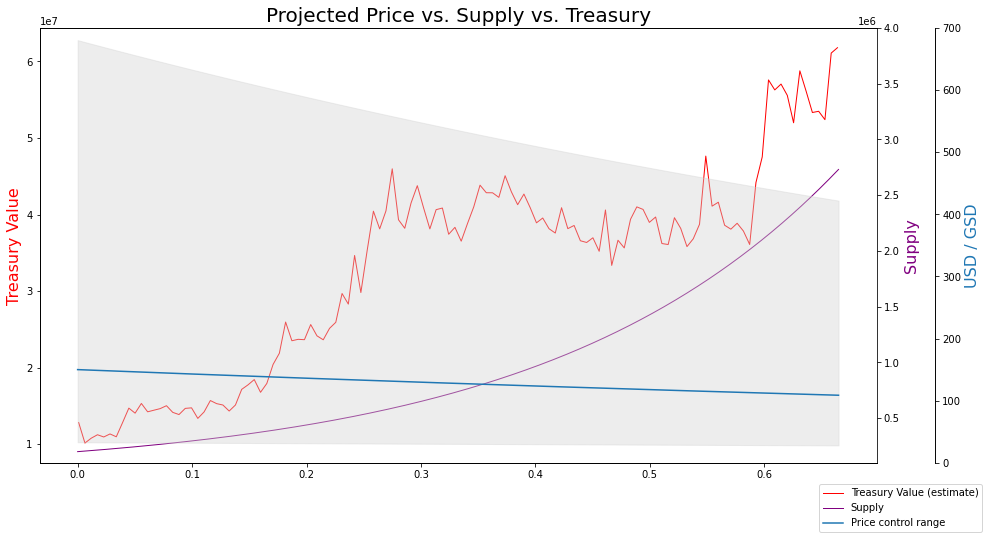

In [24]:
fig, mv_ax = plt.subplots(figsize=(15, 8))

mv_ax.spines['right'].set_position(("axes", 1.07))
mv_ax.plot(times, mv[:len(times)], color='red', label='Treasury Value (estimate)', linewidth=1)
mv_ax.set_ylabel("Treasury Value", fontsize=16, color='red')

rebase_ax = mv_ax.twinx()
rebase_ax.plot(yrs_interp[:N], supply_interp[:N], color='purple', label='Supply', linewidth=1)
rebase_ax.set_ylim(bottom=100000,top=4000000)
rebase_ax.set_ylabel("Supply", fontsize=16, color='purple')


price_ax = mv_ax.twinx()
price_ax.spines['right'].set_position(("axes", 1.07))
price_ax.plot(yrs_interp[:N], p_control[:N], label='Price control range')
price_ax.fill_between(yrs_interp[:N], p_control_lwr[:N], p_control_upr[:N], alpha=0.4, color='lightgrey')
price_ax.set_title("Projected Price vs. Supply vs. Treasury", fontsize=20)
price_ax.set_ylabel("USD / GSD", fontsize=16, color='#1f77b4')
price_ax.set_xlabel("Years", fontsize=16)
price_ax.set_ylim(bottom=0,top=700)
fig.legend(loc='lower right')

fig.savefig('../img/jt_request.png')
